In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import kstest, norm, expon

In [9]:
df = pd.read_csv('traffic.csv')

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['DateTime'] = pd.to_datetime(df['DateTime'])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [10]:
df['hour'] = df['DateTime'].dt.hour
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['month'] = df['DateTime'].dt.month

print(df.describe())

                            DateTime      Junction      Vehicles  \
count                          48120  48120.000000  48120.000000   
mean   2016-09-19 06:03:56.109725696      2.180549     22.791334   
min              2015-11-01 00:00:00      1.000000      1.000000   
25%              2016-04-16 01:45:00      1.000000      9.000000   
50%              2016-09-30 03:30:00      2.000000     15.000000   
75%              2017-02-25 16:00:00      3.000000     29.000000   
max              2017-06-30 23:00:00      4.000000    180.000000   
std                              NaN      0.966955     20.750063   

                 ID          hour   day_of_week         month  
count  4.812000e+04  48120.000000  48120.000000  48120.000000  
mean   2.016330e+10     11.500000      2.996010      5.884289  
min    2.015110e+10      0.000000      0.000000      1.000000  
25%    2.016042e+10      5.750000      1.000000      3.000000  
50%    2.016093e+10     11.500000      3.000000      5.000000  
75%

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


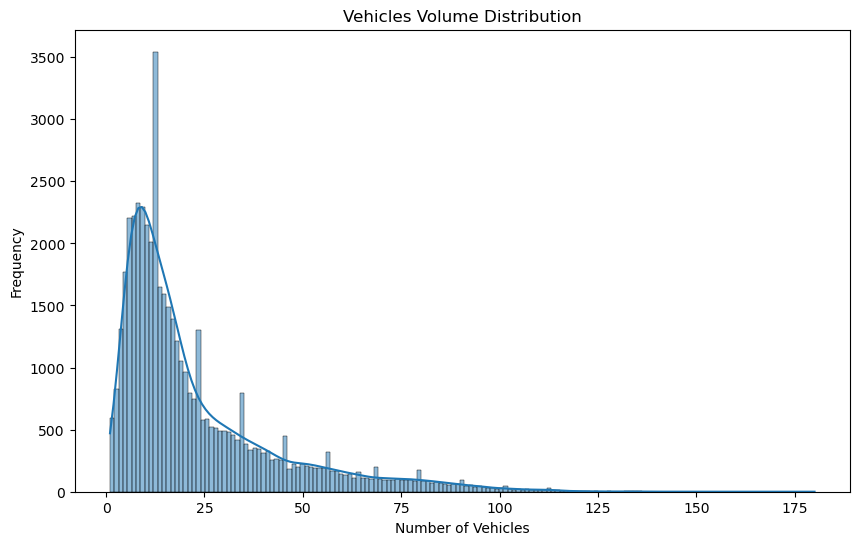

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Vehicles'], kde=True)
plt.title('Vehicles Volume Distribution')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


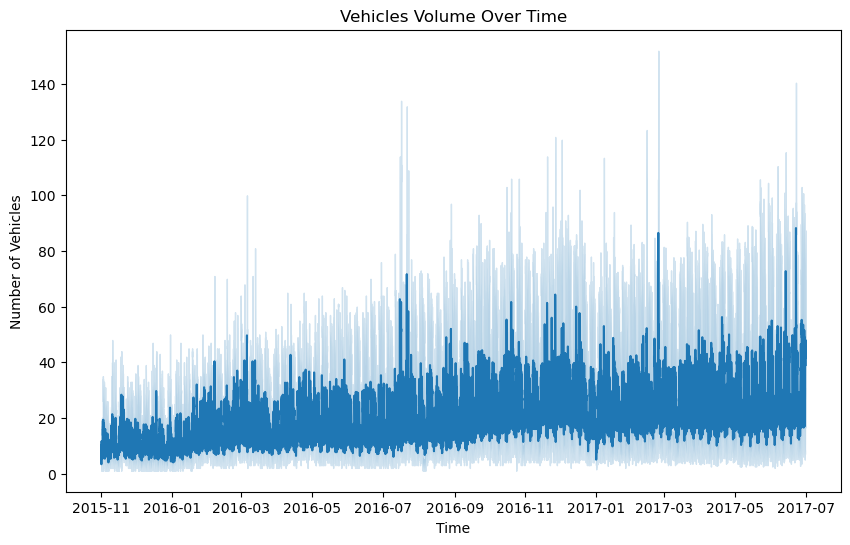

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='DateTime', y='Vehicles')
plt.title('Vehicles Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.show()

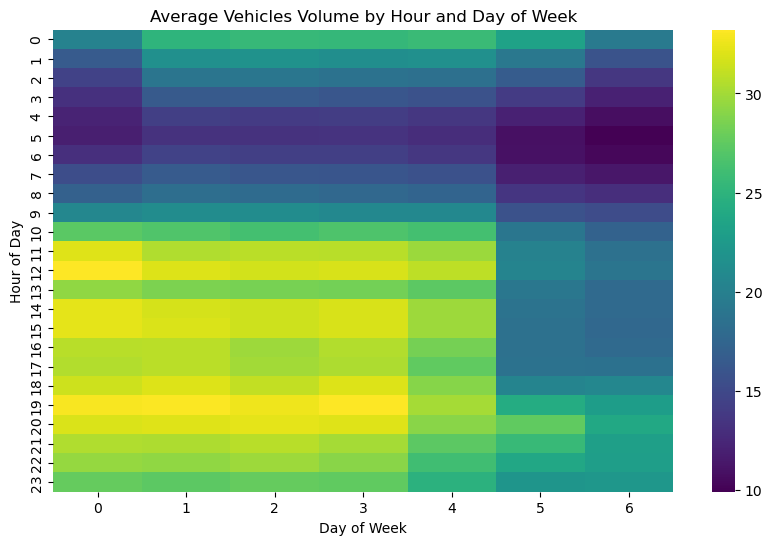

In [14]:
plt.figure(figsize=(10,6))
heatmap_data = df.pivot_table(index='hour', columns='day_of_week', values='Vehicles', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Average Vehicles Volume by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

In [15]:
# Linear Regression
X = df[['hour', 'day_of_week', 'month', 'Junction']]
y = df['Vehicles']
X = pd.get_dummies(X, columns=['Junction'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test)

mean_squared= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print('Mean Squared Error:', mean_squared)
print('R-squared:', r2)


Mean Squared Error: 172.2406009880101
R-squared: 0.5773721577970415


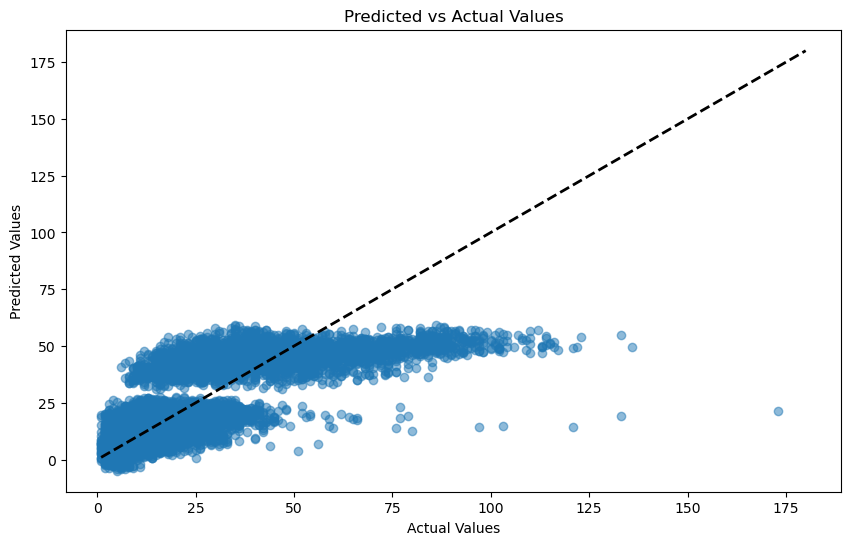

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) 
plt.show()

In [18]:
# Probability Distributions
vehicles_volume = df['Vehicles']
norms = norm.fit(vehicles_volume)
expons = expon.fit(vehicles_volume)

result_norm = kstest(vehicles_volume, 'norm', norms)
result_expon = kstest(vehicles_volume, 'expon', expons)

print(f'Normal Distribution K-S Test: {result_norm}')
print(f'Exponential Distribution K-S Test: {result_expon}')


Normal Distribution K-S Test: KstestResult(statistic=0.18908325764858236, pvalue=0.0, statistic_location=20, statistic_sign=1)
Exponential Distribution K-S Test: KstestResult(statistic=0.11149150409490696, pvalue=0.0, statistic_location=6, statistic_sign=-1)


E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


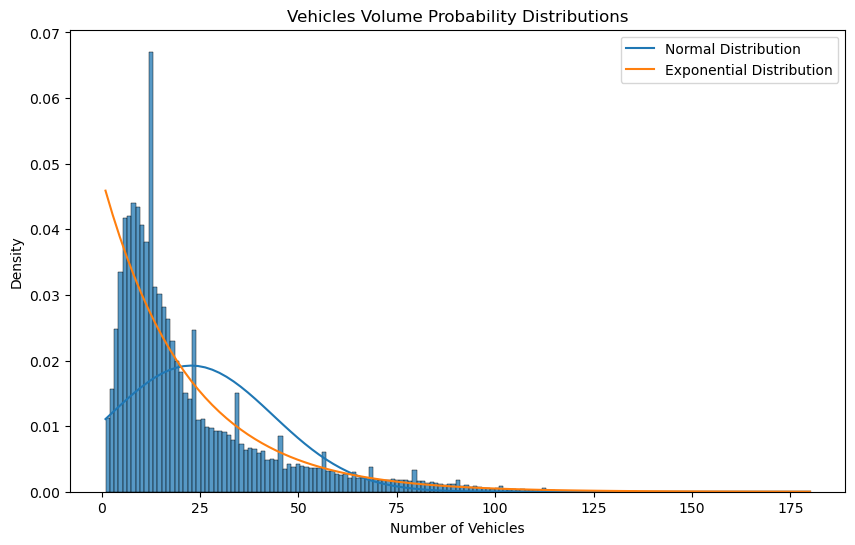

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(vehicles_volume, kde=False, stat='density')
x = np.linspace(min(vehicles_volume), max(vehicles_volume), 100)
plt.plot(x, norm.pdf(x, *norms), label='Normal Distribution')
plt.plot(x, expon.pdf(x, *expons), label='Exponential Distribution')
plt.legend()
plt.title('Vehicles Volume Probability Distributions')
plt.xlabel('Number of Vehicles')
plt.ylabel('Density')
plt.show()
